In [41]:
# Импорт основных библиотек
import numpy as np
import pandas as pd

# Импорт библиотек построения графиков и диаграмм
from matplotlib import pyplot as plt
import seaborn as sns

# Указание режима отображения диаграмм
%matplotlib inline

# Импорт основных библиотек машинного обучения
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import MinMaxScaler

# Импорт библиотек моделей машинного обучения
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Импорт библиотек отбора признаков
from sklearn.feature_selection import RFE

# Импорт библиотек оценки моделей машинного обучения
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

## 1. Описание данных

In [3]:
data_df = pd.read_csv('telecom_users.csv', index_col=0, skipinitialspace=True)

In [4]:
data_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No
6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No
432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No


In [5]:
# Удаляем признак "customerID" из датасета, т.к. никакой полезной информации он нам не несёт
data_df.drop(columns={'customerID'}, inplace=True)

In [6]:
data_df.columns.to_list()

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [7]:
# Приведение названий признаков к единому формату имен
data_df.rename(columns={'gender': 'Gender', 'tenure': 'Tenure'}, inplace=True)

### Информация о структуре исходных данных

In [8]:
data_df.shape

(5986, 20)

In [9]:
data_df.dtypes

Gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
Tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [10]:
data_df.isna().sum()

Gender               0
SeniorCitizen        0
Partner              0
Dependents           0
Tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        10
Churn                0
dtype: int64

In [11]:
# Информация о численных данных
data_df.describe(include=np.number)

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges
count,5986.000000,5986.000000,5986.000000,5976.000000
mean,0.161377,32.468760,64.802213,2298.060617
std,0.367909,24.516391,30.114702,2274.127165
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.650000,404.312500
50%,0.000000,29.000000,70.400000,1412.150000
75%,0.000000,56.000000,89.900000,3846.962500
max,1.000000,72.000000,118.750000,8684.800000


In [12]:
# Основные статистические показатели для строковых данных
data_df.describe(include=np.object)

,Gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3050,3082,4195,5396,2848,2627,2982,2605,2640,2960,2389,2356,3269,3528,2006,4399


#### Очистка данных

Пропусков в столбце TotalCharges меньше 1% от общего числа исходных данных - строки с отсутствующими данными удаляем.

In [13]:
data_df.dropna(inplace=True)

In [14]:
data_df.shape

(5976, 20)

В результате имеем: 5976 строк и 19 признаков.

In [15]:
data_df.loc[(data_df['Gender'] == "Male"), 'Gender'] = 0
data_df.loc[(data_df['Gender'] == "Female"), 'Gender'] = 1

data_df.loc[(data_df['Partner'] == "No"), 'Partner'] = 0
data_df.loc[(data_df['Partner'] == "Yes"), 'Partner'] = 1

data_df.loc[(data_df['Dependents'] == "Yes"), 'Dependents'] = 1
data_df.loc[(data_df['Dependents'] == "No"), 'Dependents'] = 0

data_df.loc[(data_df['PhoneService'] == "Yes"), 'PhoneService'] = 1
data_df.loc[(data_df['PhoneService'] == "No"), 'PhoneService'] = 0

data_df.loc[(data_df['MultipleLines'] == "Yes"), 'MultipleLines'] = 0
data_df.loc[(data_df['MultipleLines'] == "No"), 'MultipleLines'] = 1
data_df.loc[(data_df['MultipleLines'] == "No phone service"), 'MultipleLines'] = 2

data_df.loc[(data_df['InternetService'] == "Fiber optic"), 'InternetService'] = 0
data_df.loc[(data_df['InternetService'] == "DSL"), 'InternetService'] = 1
data_df.loc[(data_df['InternetService'] == "No"), 'InternetService'] = 2

data_df.loc[(data_df['OnlineSecurity'] == "No internet service"), 'OnlineSecurity'] = 0
data_df.loc[(data_df['OnlineSecurity'] == "Yes"), 'OnlineSecurity'] = 1
data_df.loc[(data_df['OnlineSecurity'] == "No"), 'OnlineSecurity'] = 2

data_df.loc[(data_df['OnlineBackup'] == "No internet service"), 'OnlineBackup'] = 0
data_df.loc[(data_df['OnlineBackup'] == "Yes"), 'OnlineBackup'] = 1
data_df.loc[(data_df['OnlineBackup'] == "No"), 'OnlineBackup'] = 2

data_df.loc[(data_df['DeviceProtection'] == "No internet service"), 'DeviceProtection'] = 0
data_df.loc[(data_df['DeviceProtection'] == "Yes"), 'DeviceProtection'] = 1
data_df.loc[(data_df['DeviceProtection'] == "No"), 'DeviceProtection'] = 2

data_df.loc[(data_df['TechSupport'] == "No internet service"), 'TechSupport'] = 0
data_df.loc[(data_df['TechSupport'] == "Yes"), 'TechSupport'] = 1
data_df.loc[(data_df['TechSupport'] == "No"), 'TechSupport'] = 2

data_df.loc[(data_df['StreamingTV'] == "No internet service"), 'StreamingTV'] = 0
data_df.loc[(data_df['StreamingTV'] == "Yes"), 'StreamingTV'] = 1
data_df.loc[(data_df['StreamingTV'] == "No"), 'StreamingTV'] = 2

data_df.loc[(data_df['StreamingMovies'] == "No internet service"), 'StreamingMovies'] = 0
data_df.loc[(data_df['StreamingMovies'] == "Yes"), 'StreamingMovies'] = 1
data_df.loc[(data_df['StreamingMovies'] == "No"), 'StreamingMovies'] = 2

data_df.loc[(data_df['Contract'] == "Month-to-month"), 'Contract'] = 0
data_df.loc[(data_df['Contract'] == "One year"), 'Contract'] = 1
data_df.loc[(data_df['Contract'] == "Two year"), 'Contract'] = 2

data_df.loc[(data_df['PaperlessBilling'] == "Yes"), 'PaperlessBilling'] = 0
data_df.loc[(data_df['PaperlessBilling'] == "No"), 'PaperlessBilling'] = 1

data_df.loc[(data_df['PaymentMethod'] == "Electronic check"), 'PaymentMethod'] = 0
data_df.loc[(data_df['PaymentMethod'] == "Mailed check"), 'PaymentMethod'] = 1
data_df.loc[(data_df['PaymentMethod'] == "Bank transfer (automatic)"), 'PaymentMethod'] = 2
data_df.loc[(data_df['PaymentMethod'] == "Credit card (automatic)"), 'PaymentMethod'] = 3

data_df.loc[(data_df['Churn'] == "No"), 'Churn'] = 0
data_df.loc[(data_df['Churn'] == "Yes"), 'Churn'] = 1

## 2. Исследование зависимостей и формулирование гипотез

Анализ целевого признака

Text(0.5, 1.0, 'Распределение оттока клиентов')

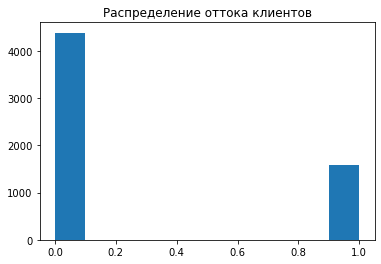

In [42]:
plt.hist(data_df['Churn'])
plt.title("Распределение оттока клиентов")

### Анализ категориальных и бинарных признаков 

In [43]:
# Определение списка категориальных признаков, за исключением целевого признака
columns = data_df.columns[data_df.dtypes == object][:-1].to_list()

C:\Users\nadya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nadya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nadya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nadya\anaconda3\lib\si

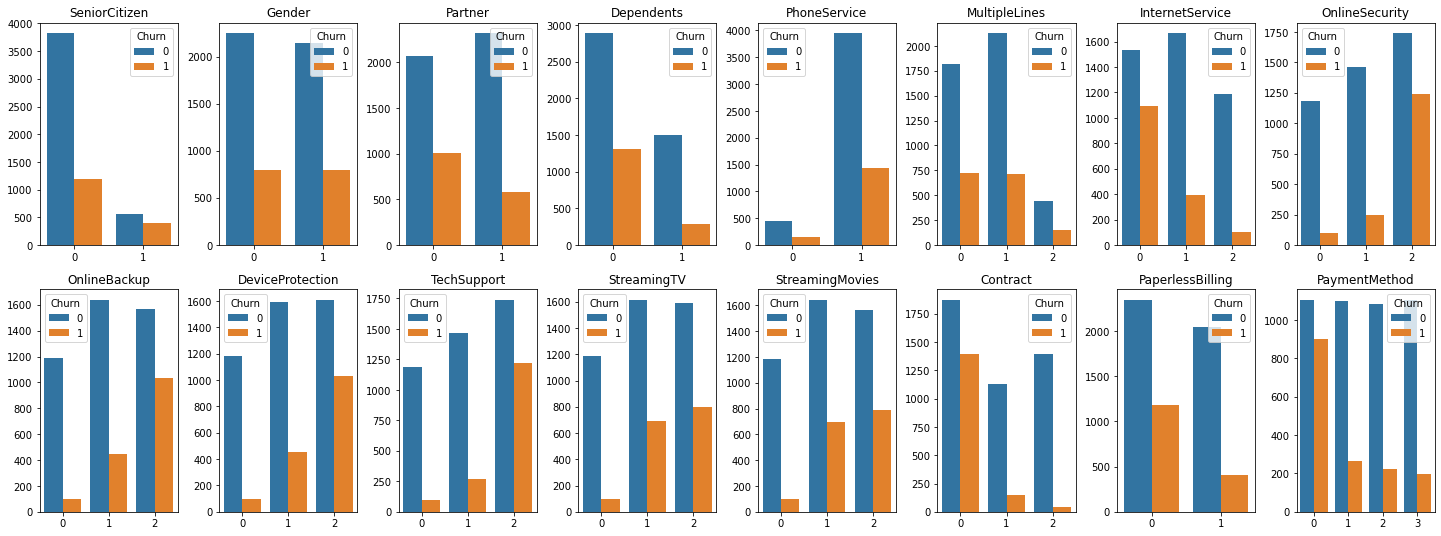

In [44]:
# Создание основных объектов диаграммы
fig, axes = plt.subplots(2, 8, figsize=(25, 9), gridspec_kw={'wspace': 0.3})

# Построение связи признаков с оттоком клиентов
for column, ax in zip(['SeniorCitizen'] + columns, axes.flat):
    sns.countplot(column, hue='Churn', data=data_df, ax=ax).set_title(column)
    
# Оформление диаграммы
plt.setp(axes, xlabel=None, ylabel=None)

# Вывод диаграммы
plt.show()

Из диаграмм видно, что все признаки, за исключением Gender, PhoneService, MultipleLines, StreamingTV и StreamingMovies имеют линейную связь с оттоком клиентов.

In [45]:
data_2 = data_df[(data_df.columns[data_df.dtypes != object])]
data_2['Churn'] = data_df['Churn']

<ipython-input-45-80df59c024dc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['Churn'] = data_df['Churn']


### Поиск зависимостей

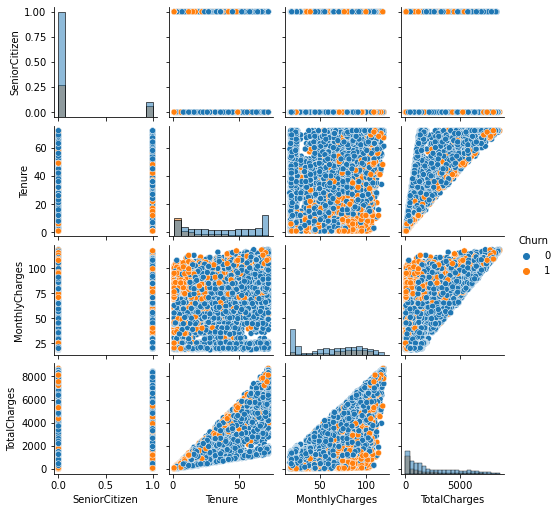

In [46]:
# Вывод пар признаков в матричном виде
sns.pairplot(data_2, hue = 'Churn', diag_kind='hist', height=1.8)
# Вывод диаграммы
plt.show()

Признак SeniorCitizen не имеет достаточно высокий характер силы связи с остальными признаками.

### Матрица корреляции с линейными коэффициентами Пирсона

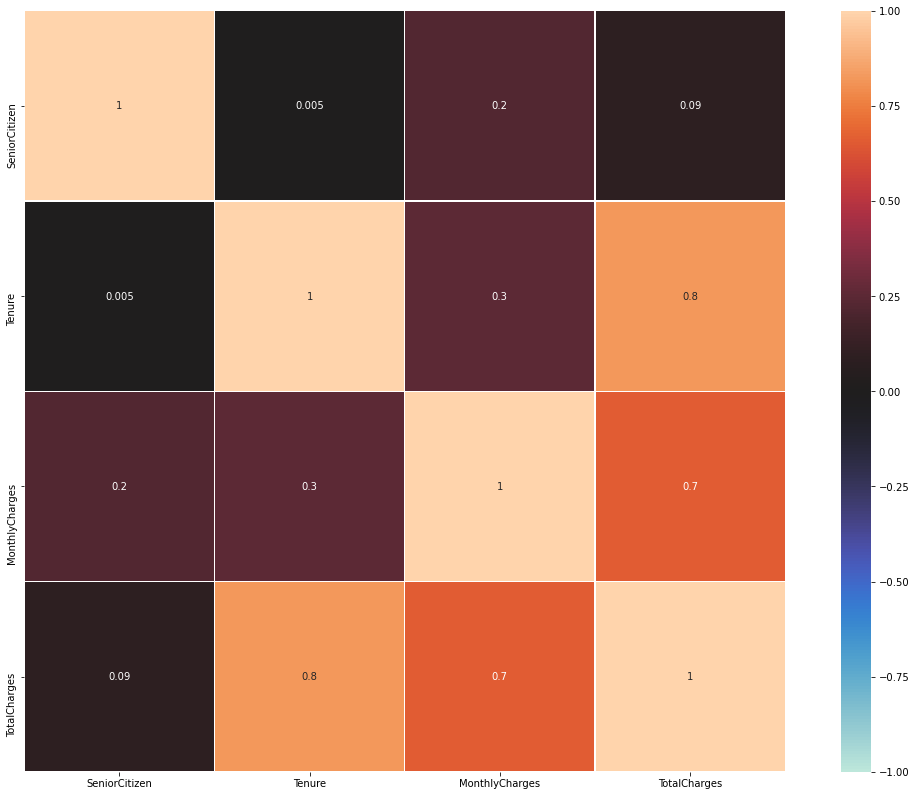

In [47]:
# Определение размера диаграммы
plt.figure(figsize=(20, 14))

# Вывод корреляционной матрицы
ax = sns.heatmap(
    data_df.corr(), square=True, vmin=-1, vmax=1, center= 0,
    linewidths=0.1, linecolor='white', annot=True, fmt='.1g', 
    cbar_kws=dict(ticks=np.arange(-1.0, 1.1, 0.25), aspect=25))

# Вывод диаграммы
plt.show()

По мартице видна корреляция между TotalCharges и двумя признаками: MonthlyCharges & Tenure. Но исключать данные пока не будем.

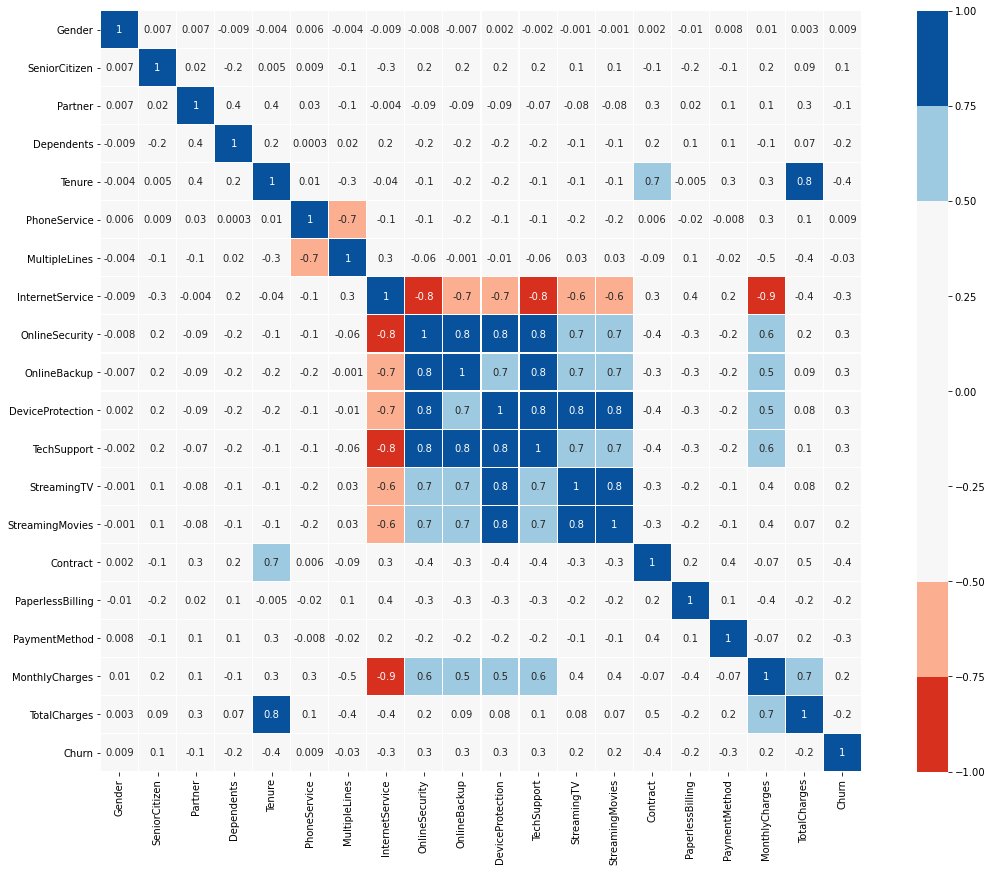

In [48]:
data_df_1 = data_df.astype(np.float)
#Выведем матрицу корреляции с линейными коэффициентами Пирсона и проведем оценку степени линейной зависимости между признаками.

# Создание новой цветовой карты для подсвечивания сильных связей
color_map = sns.color_palette(['#d7301f', '#fcae91', '#f7f7f7', '#f7f7f7', '#f7f7f7', '#f7f7f7', '#9ecae1', '#08519c'])

# Определение размера диаграммы
plt.figure(figsize=(20, 14))

# Вывод корреляционной матрицы
ax = sns.heatmap(
    data_df_1.corr(), cmap=color_map, square=True, vmin=-1, vmax=1, center= 0,
    linewidths=0.1, linecolor='white', annot=True, fmt='.1g', 
    cbar_kws=dict(ticks=np.arange(-1.0, 1.1, 0.25), aspect=25))

# Вывод диаграммы
plt.show()

По данной матрице видно, что: 

1)PhoneService и MultipleLines - отрицательно коррелируются. Один из признаков можно удалить из датасета

2)InternetService коррелируется отрицательно достаточно сильно со следующими признаками: OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies. Это даёт нам возможность оставить один принзак InternetService, а остальные удалить из датасета.

Но исключать данные не будем.

### Результаты и выводы

В результате проведенного анализа были определены какие признаки больше всего могут оказывать влияние на отток клиентов, которые в последующем будут использованы для прогнозирования целевой переменной.

Также сформулируем ряд предположений, которые проверим в ходе работы:

    1) Между признаками и оттоком клиентов существует линейная зависимость, что позволит прогнозировать поведение клиентов с достаточной точностью;
    
    2) Модель с лучшим определением групп высокого риска оттока предпочтительнее, чем модель с большим охватом.
    
    3) Влияние признаков Gender, PhoneService на отток не существенно

### 3. Построим модели для прогнозирования оттока

In [16]:
# Определение тренировочной и контрольной выборок
X_train, X_test, y_train, y_test = train_test_split(
    data_df.iloc[:, :-1].values, data_df.iloc[:, -1].values, random_state=17, stratify=data_df.iloc[:, -1].values)

In [17]:
y_train = y_train.astype('float')
y_test = y_test.astype('float')

In [18]:
X_train.shape

(4482, 19)

In [19]:
#Нормализирую данные в диапазон от 0 до 1

X_train = MinMaxScaler().fit_transform(X_train)
X_test = MinMaxScaler().fit_transform(X_test)

In [20]:
# Определение значимых признаков для прогноза целевой переменной
rfe_model = RFE(RandomForestClassifier(max_depth=3), 10).fit(X_train, y_train)

#Вывод признаков
print(data_df.iloc[:, :-1].columns[rfe_model.support_].tolist())

C:\Users\nadya\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


['Tenure', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [21]:
# Определение базовых алгоритмов машинного обучения
models = [KNeighborsClassifier(),
          LogisticRegression(random_state=17),
          GaussianNB(), 
          SVC(random_state=17), 
          RandomForestClassifier(n_jobs=-1, random_state=17), 
          XGBClassifier(n_jobs=-1, random_state=17)]

# Список метрик качества алгоритмов
scores = []

# Поиск подходящего базового алгоритма машинного обучения
for n, model in enumerate(models):
    scores.append(cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=10, n_jobs=-1).mean())

# Список наименований базовых алгоритмов
names = ['Метод К-ближайших соседей', 'Логистическая Регрессия','Байесовский классификатор', 
         'Метод опорных векторов', 'Случайный лес', 'Градиентный бустинг']

# Вывод метрик качества базовых алгоритмов
pd.DataFrame({'AUC': scores}, index=names)

,AUC
Метод К-ближайших соседей,0.759112
Логистическая Регрессия,0.840278
Байесовский классификатор,0.808316
Метод опорных векторов,0.795087
Случайный лес,0.819876
Градиентный бустинг,0.813465


### По результатам - лучшая метрика качества показана Логистической регрессией. Далее Случайный лес, Байесовский классификатор и Градиентный бустинг

Но градиентный бустинг можно настроить с помощью гиперпараметров, а логистическая регрессия может задавать веса параметров. Используем это, что бы улучшить метрику качества 

In [22]:
# Гиперпараметры модели машинного обучения
params = {'n_estimators': np.arange(10, 100, 10),
          'max_depth': np.arange(2, 10, 2),
          'learning_rate': np.arange(0.1, 0.3, 0.1)}
# Определение алгоритма модели машинного обучения
model = XGBClassifier(n_jobs=-1, random_state=17)

# Поиск оптимальных параметров модели машинного обучения
xgb_model = GridSearchCV(model, params, scoring='roc_auc', cv=10, n_jobs=-1).fit(X_train, y_train)

# Вывод метрики качества модели
pd.DataFrame({'AUC': xgb_model.best_score_}, index=['Градиентный бустинг'])

[19:40:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\nadya\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


,AUC
Градиентный бустинг,0.844654


In [23]:
xgb_model.best_params_

{'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 50}

In [26]:
# Гиперпараметры модели машинного обучения
params = {'n_estimators': [50],
          'max_depth': [2],
          'learning_rate': [0.2]}
# Определение алгоритма модели машинного обучения
model = XGBClassifier(n_jobs=-1, random_state=17)

# Поиск оптимальных параметров модели машинного обучения
xgb_model = GridSearchCV(model, params, scoring='roc_auc', cv=10, n_jobs=-1).fit(X_train, y_train)

# Вывод метрики качества модели
pd.DataFrame({'AUC': xgb_model.best_score_}, index=['Градиентный бустинг'])

[19:44:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\nadya\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


,AUC
Градиентный бустинг,0.844654


In [27]:
# Гиперпараметры модели машинного обучения
params = {'C': np.arange(0.1, 2, 0.02)}
# Определение алгоритма модели машинного обучения
model = LogisticRegression(random_state=17)

# Поиск оптимальных параметров модели машинного обучения
lr_model = GridSearchCV(model, params, scoring='roc_auc', cv=10, n_jobs=-1).fit(X_train, y_train)

# Вывод метрики качества модели
pd.DataFrame({'AUC': lr_model.best_score_}, index=['Логистическая регрессия'])

,AUC
Логистическая регрессия,0.840454


In [28]:
lr_model.best_params_

{'C': 1.9200000000000004}

#### С помощью гиперпараметров смог улучшить метрику Бустинга до 0.845251 и Логистической регрессии до 0.840377

In [29]:
# Гиперпараметры мета-модели
params = {'n_estimators': np.arange(10, 100, 10),
          'learning_rate': np.arange(0.1, 1.0, 0.2),
          'min_child_weight': np.arange(1, 10, 2),
          'subsample': np.arange(0.1, 1.0, 0.2)}

# Определение базовых алгоритмов мета-модели
meta_alg = [LogisticRegression(random_state=17, C = 1.92), 
            GaussianNB(), 
            SVC(random_state=17), 
            RandomForestClassifier(n_jobs=-1, random_state=17)]

# Определение алгоритма мета-модели
model = XGBClassifier(n_jobs=-1, random_state=17, learning_rate=0.2, max_depth = 2, n_estimators = 50)

# Получение матрицы мета-признаков на основе тренировочных данных
meta_mtrx = np.empty((X_train.shape[0], len(meta_alg)))
for n, alg in enumerate(meta_alg):
    meta_mtrx[:, n] = cross_val_predict(alg, X_train, y_train, cv=10, n_jobs=-1)

# Получение матрицы мета-признаков на основе тестовых данных
meta_mtrx_test = np.empty((X_test.shape[0], len(meta_alg)))
for n, alg in enumerate(meta_alg):
    meta_mtrx_test[:, n] = alg.fit(X_train, y_train).predict(X_test)

# Поиск оптимальных параметров мета-модели
meta_model = GridSearchCV(model, params, cv=10, scoring='roc_auc', n_jobs=-1).fit(meta_mtrx, y_train)

# Вывод метрики качества модели
pd.DataFrame({'AUC': meta_model.best_score_}, index=['Стекинг'])

[19:52:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\nadya\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


,AUC
Стекинг,0.796055


#### В итоге: стекинг показал точность ниже, нежели Градиентный Бустинг и Логистическая регрессия. Поэтмоу в дальнейшем будем работать с этими моделями.

Установка лучших параметров у моделей

In [38]:
lr_model = LogisticRegression(random_state=17, C = 1.92).fit(X_train, y_train)
xgb_model = XGBClassifier(n_jobs=-1, random_state=17, learning_rate=0.2, max_depth = 2, n_estimators = 50).fit(X_train, y_train)

[20:05:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\nadya\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [39]:
# Расчет прогноза моделей
lr_predict = lr_model.predict(X_test)
xgb_predict = xgb_model.predict(X_test)


# Вывод метрик качества моделей
pd.DataFrame({'AUC': [roc_auc_score(y_test, lr_predict), roc_auc_score(y_test, xgb_predict)], 
              'Recall': [recall_score(y_test, lr_predict), recall_score(y_test, xgb_predict)],
              'Precision': [precision_score(y_test, lr_predict), precision_score(y_test, xgb_predict)]}, 
             index=['Логистическая регрессия', 'Градиентный бустинг'])

,AUC,Recall,Precision
Логистическая регрессия,0.718365,0.541562,0.651515
Градиентный бустинг,0.713867,0.518892,0.673203


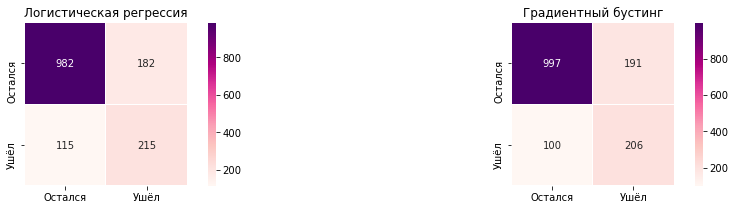

In [40]:
#Матрицы ошибок

# Определение размера диаграмм
fig, axes = plt.subplots(1, 2, figsize=(16, 3))

# Список целевых переменных предсказанных моделями
y_predicts = [lr_predict, xgb_predict]

# Список наименований моделей
name_models = ['Логистическая регрессия', 'Градиентный бустинг']

# Вывод матриц ошибок
for ax, y_predict, name in zip(axes.flat, y_predicts, name_models):
    sns.heatmap(
        confusion_matrix(y_predict, y_test), cmap='RdPu', square=True, 
        linewidths=0.1, linecolor='white', annot=True, fmt='d', 
        xticklabels=[ 'Остался', 'Ушёл'], 
        yticklabels=[ 'Остался', 'Ушёл'],
        ax=ax
    ).set_title(name)

# Вывод диаграмм
plt.show()

Из результатов сравнения моделей видно, что Логистическая регрессия превосходит Градиентный бустинг по показателю полноты (Recall). При 397 фактических случаев ухода клиентов, 215 оказались правильными. По показателю точности (Precision) на первом месте Градиентный бустинг. При 306 спрогнозированных случаях оттока, 206 правильные.

В итоге выбор останавливаю на Логистической Регрессии, т.к. данная модель производит лучший охват в прогнозе оттока клиентов.

### Подводя итоги по проекту можно сделать следующие выводы:

    1)Гипотеза об отсутствии влияния признаков Gender, PhoneService  на отток клиентов подтвердилась.
    
    2)Предсказывая отток, Компании важно не упустить клиентов, которые на самом деле уйдут, то есть свести к минимуму ложноотрицательные прогнозы моделей и ориентироваться на метрику полноты (Recall). Логистическая регрессия превзошла Градиентный бустинг с показателем 0.541562. По показателю полноты данную модель будем считать лучшей;
    
    3)Нас интересует как полнота прогнозирования, так и интерпретируемость модели. Разделяя клиентов по степени уверенности потери, на основе показателя точности (Precision), можем выявить первоочередные группы (группы высокого риска). Точное и своевременное нахождение таких групп позволит эффективно бороться с оттоком. Учитывая немаловажность показателя точности в области принятия решений, допускаю, что модель с лучшим определением групп высокого риска предпочтительнее для Компании, чем модель с большим охватом оттока. Поэтому модель Градиентного бустинга для бизнеса подходит больше, чем модель Логистической регрессии;
    
    4)Также можно отметить, что количество предоставленных данных (клиентов) недостаточно для построения точной модели и важно продолжать расширять клиентскую базу.
